In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Make simple masks

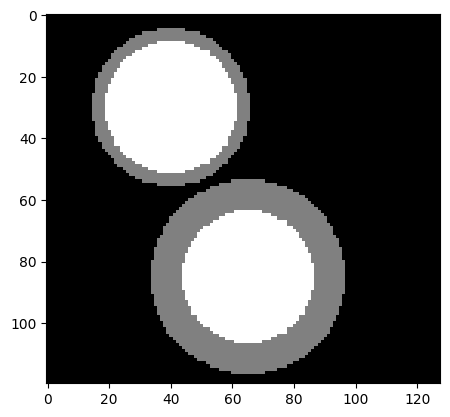

True

In [166]:
def simulate_bin_circle():
    image_hole = np.zeros((120, 128), dtype=np.float32)
    center_coordinates = (40, 30)
    center_coordinates2 = (65, 85)
    radius = 20

    color_border = (128, 0, 0)
    color_hole = (255, 0, 0)
    color = (191, 0, 0)
    
    thickness_border = -1
    thickness_hole = -1

    
    # image_border = cv2.circle(image_hole, center_coordinates, radius+2, color_border, thickness_border)

    image_border = cv2.circle(image_hole, center_coordinates, radius+4, color_border, 2)
    image_border = cv2.circle(image_border, center_coordinates, radius+4, color_border, thickness_border)
    image_hole = cv2.circle(image_border, center_coordinates, radius, color_hole,2)
    image_hole = cv2.circle(image_hole, center_coordinates, radius, color_hole, thickness_hole)

    
    image_border = cv2.circle(image_hole, center_coordinates2, radius+10, color_border, 2)
    image_border = cv2.circle(image_border, center_coordinates2, radius+10, color_border, -1)
    image_hole = cv2.circle(image_border, center_coordinates2, radius, color_hole, 2)
    image_hole = cv2.circle(image_hole, center_coordinates2, radius, color_hole, thickness_hole)

    plt.imshow(image_hole, cmap='gray')
    plt.show()
    return image_border

img = simulate_bin_circle()
img_large = img

circle2 = img_large.copy()

cv2.imwrite('input_crop_mask.png', np.clip(circle2, 0, 255))

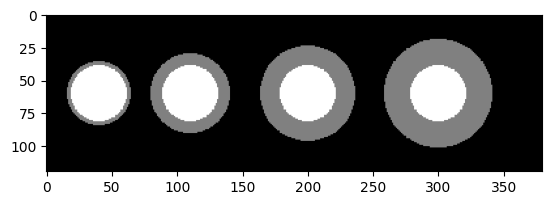

True

In [167]:
def simulate_circles():
    image_hole = np.zeros((120, 380), dtype=np.float32)
    center_coordinates1 = (40, 60)
    center_coordinates2 = (110, 60)
    center_coordinates3 = (200, 60)
    center_coordinates4 = (300, 60)

    radius = 20

    color_border = (128, 0, 0)
    color_hole = (255, 0, 0)
    
    thickness_border = -1
    thickness_hole = -1

    # border 3
    image_border = cv2.circle(image_hole, center_coordinates1, radius+3, color_border, 2)
    image_border = cv2.circle(image_border, center_coordinates1, radius+3, color_border, thickness_border)
    image_hole = cv2.circle(image_border, center_coordinates1, radius, color_hole,2)
    image_hole = cv2.circle(image_hole, center_coordinates1, radius, color_hole, thickness_hole)

    # border 9
    image_border = cv2.circle(image_hole, center_coordinates2, radius+9, color_border, 2)
    image_border = cv2.circle(image_border, center_coordinates2, radius+9, color_border, thickness_border)
    image_hole = cv2.circle(image_border, center_coordinates2, radius, color_hole,2)
    image_hole = cv2.circle(image_hole, center_coordinates2, radius, color_hole, thickness_hole)

    # border 15
    image_border = cv2.circle(image_hole, center_coordinates3, radius+15, color_border, 2)
    image_border = cv2.circle(image_border, center_coordinates3, radius+15, color_border, thickness_border)
    image_hole = cv2.circle(image_border, center_coordinates3, radius, color_hole,2)
    image_hole = cv2.circle(image_hole, center_coordinates3, radius, color_hole, thickness_hole)

    # border 20
    image_border = cv2.circle(image_hole, center_coordinates4, radius+20, color_border, 2)
    image_border = cv2.circle(image_border, center_coordinates4, radius+20, color_border, thickness_border)
    image_hole = cv2.circle(image_border, center_coordinates4, radius, color_hole,2)
    image_hole = cv2.circle(image_hole, center_coordinates4, radius, color_hole, thickness_hole)

    # print(np.unique(image_border))
    plt.imshow(image_hole, cmap='gray')
    plt.show()

    # cv2.imwrite('./data/test_img_two.png', image_border)
    return image_border

img_circles = simulate_circles()
cv2.imwrite('difr_circles.png', np.clip(img_circles, 0, 255))

[ 4 16 28 40]
(array([46., 58., 70., 82.]), array([0., 0., 0., 0.]), array([ 17.,  81., 165., 259.]), array([ 63., 139., 235., 341.]))


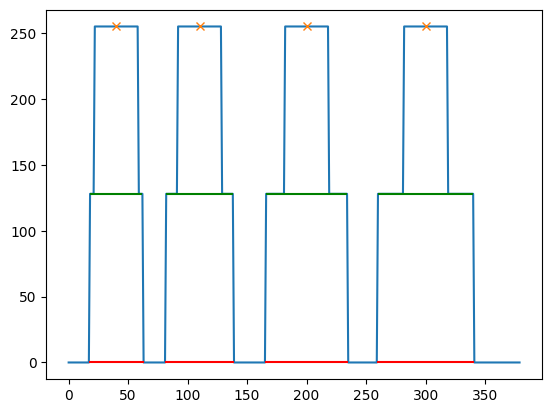

In [168]:
from scipy.signal import chirp, find_peaks, peak_widths

peaks, _ = find_peaks(img_circles[50,:])
results_half = peak_widths(img_circles[50,:], peaks, rel_height=0.5)
print(results_half[0].astype(np.int32) - 2*20)
results_full = peak_widths(img_circles[50,:], peaks, rel_height=1)
print(results_full)
plt.plot(img_circles[50,:])
plt.plot(peaks, img_circles[50,:][peaks], "x")
plt.hlines(*results_half[1:], color="green")
plt.hlines(*results_full[1:], color="red")
plt.show()

## Смотрим на срезы сразу после маски

Text(0.5, 1.0, 'Сразу после маски горизонтальный срез')

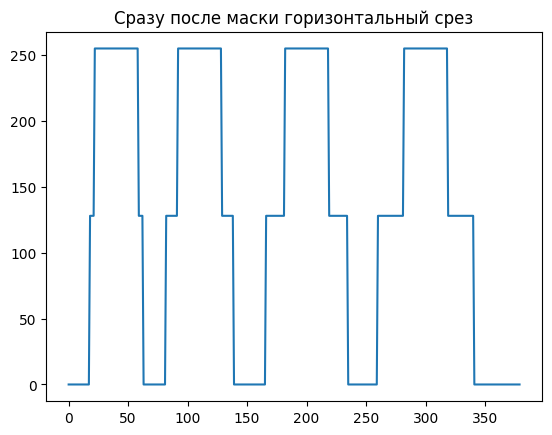

In [169]:
plt.plot(np.arange(0, img_circles.shape[1]), img_circles[50,:])
plt.title('Сразу после маски горизонтальный срез')

Text(0.5, 1.0, 'Сразу после маски вертикальный срез')

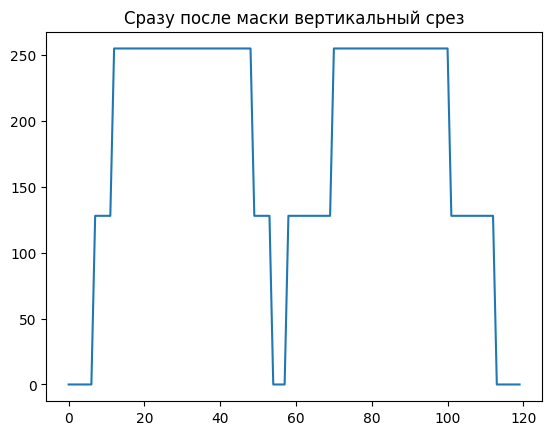

In [170]:
plt.plot(np.arange(0, circle2.shape[0]), circle2[:,50])
plt.title('Сразу после маски вертикальный срез')

## Считаем ширину границ

In [137]:
# for col in range(0, cols):
#     # if col == 41:
#     col_mask_bord = bord_mask[:,col]
#     col_mask_hole = hole_mask[:,col]

#     nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
#     nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

#     start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
#     start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1
#     gray_segments = []
#     # white_segments_cols = []
#     segments= []
#     for i in range(0, len(start_ind_bord), 2):
#         gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))

#     # for i in range(0, len(start_ind_hole), 2):
#     #     white_segments_cols.append((start_ind_hole[i], start_ind_hole[i+1]))
    
#     work_segments = []
#     for segm in gray_segments:
#         for i in segm:
#             if i in start_ind_hole:
#                 work_segments.append(segm)
#     for segm in work_segments:
#         angles_final[segm[0]:segm[1], col] = angles_cols[segm[0]:segm[1], col]


# for row in range(0, rows):
#     # if col == 41:
#     row_mask_bord = bord_mask[row,:]
#     row_mask_hole = hole_mask[row,:]

#     nonzero_ind_bord = np.nonzero(row_mask_bord)[0]
#     nonzero_ind_hole = np.nonzero(row_mask_hole)[0]

#     start_ind_bord = np.where(np.diff(row_mask_bord == 128))[0] + 1
#     start_ind_hole = np.where(np.diff(row_mask_hole == 255))[0] + 1
#     gray_segments = []
#     # white_segments_cols = []
#     segments= []
#     for i in range(0, len(start_ind_bord), 2):
#         gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))

#     # for i in range(0, len(start_ind_hole), 2):
#     #     white_segments_cols.append((start_ind_hole[i], start_ind_hole[i+1]))
    
#     work_segments = []
#     for segm in gray_segments:
#         for i in segm:
#             if i in start_ind_hole:
#                 work_segments.append(segm)
#     for segm in work_segments:
#         # angles_final[row, segm[0]:segm[1]] = -2
#         angles_final[row, segm[0]:segm[1]] = angles_copy_rows[row, segm[0]:segm[1]]

In [171]:
def get_edges_width(img):
    # mask_bord_bin = img == 128
    # mask_bord_bin = mask_bord_bin.astype(np.uint8)

    # rows, cols = img.shape

    # bord_mask = cv2.inRange(img, 128, 128)
    # bord_mask[bord_mask == 255] = 128
    bord_mask = img == 128
    bord_mask = bord_mask.astype(np.uint8)
    # bord_mask = bord_mask.astype(np.uint8)

    hole_mask = cv2.inRange(img, 255,255)
    rows, cols = img.shape
    dist_final = np.zeros_like(img)
    dist_y = np.zeros_like(img, dtype=np.float32)
    for col in range(0, cols):
        col_mask = bord_mask[:, col]
        nonzero_ind = np.nonzero(col_mask)[0]
        start_ind = np.where(np.diff(col_mask == 1))[0] + 1
        segments = np.split(col_mask, start_ind)
        tmp = 0 
        
        for segm in segments:
            dist_y[:, col][tmp:tmp + len(segm)] = (len(segm))
            tmp = tmp + len(segm)
    dist_x = np.zeros_like(img, dtype=np.float32)
    for row in range(0, rows):
        row_mask = bord_mask[row,:]
        nonzero_ind = np.nonzero(row_mask)[0]
        start_ind = np.where(np.diff(row_mask == 1))[0] + 1
        segments = np.split(row_mask, start_ind)
        tmp = 0 
        
        for segm in segments:
            dist_x[row, :][tmp:tmp + len(segm)] = (len(segm))
            tmp = tmp + len(segm)
    y = dist_y.copy()
    x = dist_x.copy()

    dist = np.zeros_like(dist_x,dtype=np.float32)
    dist[img == 128] = np.minimum(dist_x[img == 128], dist_y[img == 128])
    dist[img != 0] = np.minimum(dist_x[img != 0], dist_y[img != 0])

    # ___added____
    bord_mask = cv2.inRange(img, 128, 128)
    bord_mask[bord_mask == 255] = 128
    hole_mask = cv2.inRange(img, 255,255)
    hole_mask = hole_mask.astype(np.uint8)
    bord_mask = bord_mask.astype(np.uint8)
    for col in range(0, cols):
        # if col == 41:
        col_mask_bord = bord_mask[:,col]
        col_mask_hole = hole_mask[:,col]

        nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
        nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

        start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1
        gray_segments = []
        segments= []
        for i in range(0, len(start_ind_bord), 2):
            gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))
        work_segments = []
        for segm in gray_segments:
            for i in segm:
                if i in start_ind_hole:
                    work_segments.append(segm)
        for segm in work_segments:
            # print(segm)
            dist_final[segm[0]:segm[1], col] = y[segm[0]:segm[1], col]


    for row in range(0, rows):
        # if row == 95:
        row_mask_bord = bord_mask[row,:]
        row_mask_hole = hole_mask[row,:]

        nonzero_ind_bord = np.nonzero(row_mask_bord)[0]
        nonzero_ind_hole = np.nonzero(row_mask_hole)[0]

        start_ind_bord = np.where(np.diff(row_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(row_mask_hole == 255))[0] + 1
        # print('start ind hole', start_ind_hole)
        gray_segments = []
        # white_segments_cols = []
        segments= []
        for i in range(0, len(start_ind_bord), 2):
            gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))

        # for i in range(0, len(start_ind_hole), 2):
        #     white_segments_cols.append((start_ind_hole[i], start_ind_hole[i+1]))
        # print('gray_segments', gray_segments)
        
        work_segments = []
        for segm in gray_segments:
            for i in segm:
                if i in start_ind_hole:
                    work_segments.append(segm)
        # print('work_segments', work_segments)
        
        for segm in work_segments:
            # angles_final[row, segm[0]:segm[1]] = -2
            dist_final[row, segm[0]:segm[1]] = x[row, segm[0]:segm[1]]

    # return dist_final, dist_y, dist_x
    

    

    # dist = np.zeros_like(dist_x,dtype=np.float32)
    # dist[img == 128] = np.minimum(dist_x[img == 128], dist_y[img == 128])
    # dist[img != 0] = np.minimum(dist_x[img != 0], dist_y[img != 0])

    return dist

In [172]:
img_circles_edges_width = get_edges_width(img_circles)
# test = get_edges_width(img_circles)
# plt.imshow(img_circles_edges_width)
# plt.imshow(img_circles_edges_width)


### Получение карты углов

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

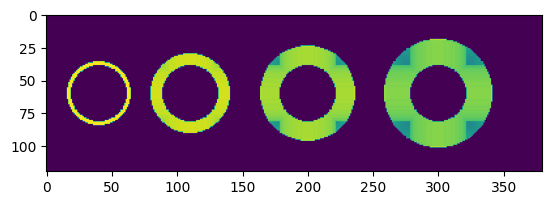

In [173]:
def get_edges_angles(img, edges_width):
    return np.arctan(700 / (edges_width[img == 128] * 12))

angles_edges_img_circles = np.zeros_like(img_circles, dtype=np.float32)
angles_edges_img_circles[img_circles==128] = get_edges_angles(img_circles, img_circles_edges_width)

plt.imshow(angles_edges_img_circles)
plt.plot

Text(0.5, 1.0, 'график карты углов в радианах, y=35')

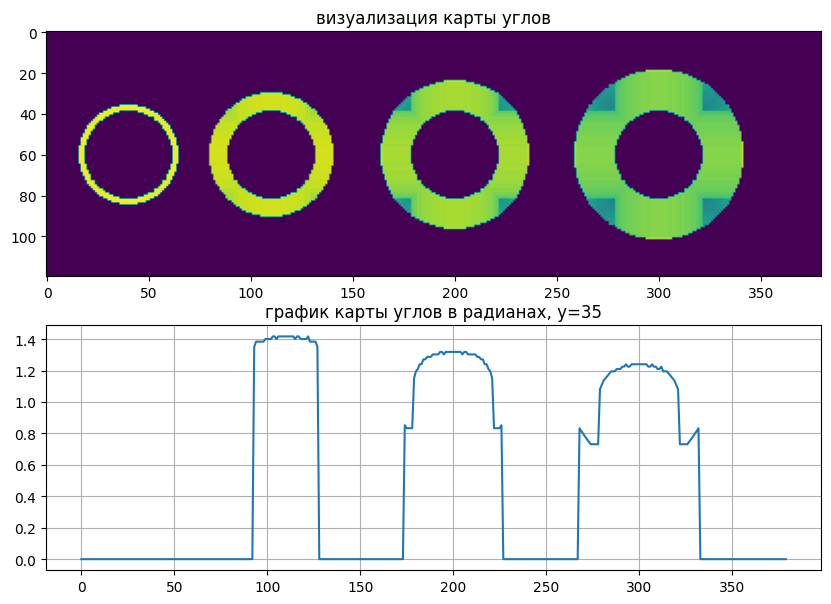

In [180]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
y = 35
ax[0].imshow(angles_edges_img_circles)
ax[0].set_title('визуализация карты углов')
# ax[1].plot(np.arange(0, len(angles_edges_img_circles)), angles_edges_img_circles[:,45])
ax[1].plot(np.arange(0, angles_edges_img_circles.shape[1]), angles_edges_img_circles[y,:])

ax[1].grid()
ax[1].set_title(f'график карты углов в радианах, y={y}')

## маска -> карта высот
или карта углов

отверстие на уровне 0-10

резист на уровне 700



In [102]:
def transform_map_height(img, map_angles):
    map_height = img.copy()
    map_height[img == 0] = 100
    map_height[img == 255] = 90
    # map_height[img == 128] = 90 + 100*np.cos(map_angles[img == 128])
    map_height[img == 128] = (90 + 100)//2

    
    return map_height

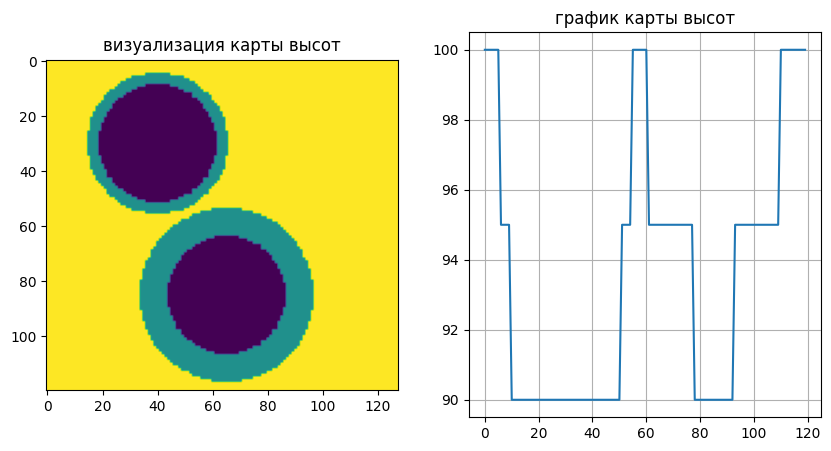

In [10]:
map_height = transform_map_height(crop, angles_edges)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(map_height)
ax[0].set_title('визуализация карты высот')
ax[1].plot(np.arange(0, len(map_height)), map_height[:,45])
ax[1].grid()
ax[1].set_title('график карты высот')

plt.show()

### Получение карты цветов

In [175]:
color_back = 120
color_hole = 90
color_edge = (color_back + color_hole)//2

### неправильно считаются цвета в сегментах где нет дырок

### надо делить их пополам и пересчитывать цвета

переписать так чтобы для тех где есть белый считалось одним образом, а где нет - делилось пополам и далее считалось


## Добавить на границы немного гауссовского размытия, чтобы сделать более плавные переходы

[  0 255]


Text(0.5, 1.0, 'График карты углов, y=35')

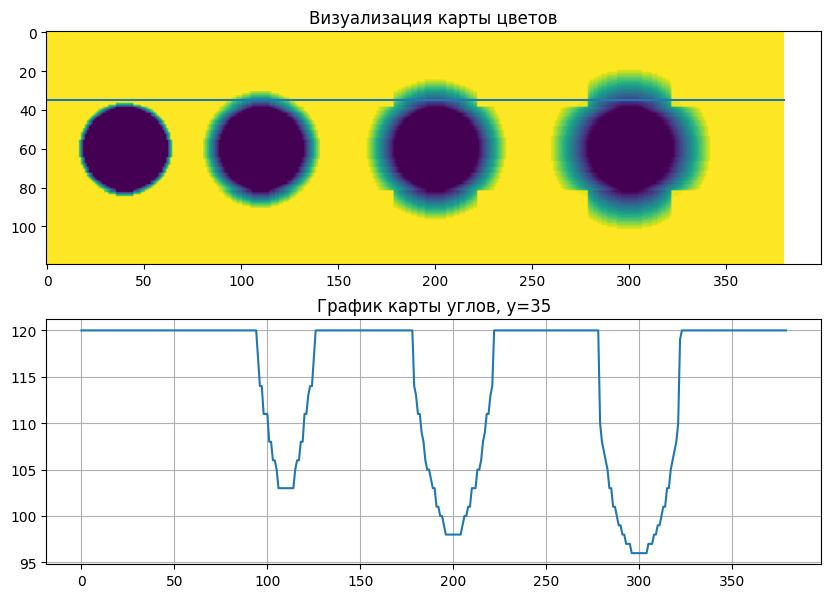

In [182]:
def get_color_map(img, color_back, color_hole):
    bord_mask = cv2.inRange(img, 128, 128)
    bord_mask[bord_mask == 255] = 128

    hole_mask = cv2.inRange(img, 255,255)
    print(np.unique(hole_mask))
    color_final = np.zeros_like(img)
    rows, cols = img.shape
    color_final[img == 0] = color_back # у фона цвет 100
    color_final[img == 255] = color_hole # у дна цвет 90

    for col in range(0, cols):
        col_mask_bord = bord_mask[:,col]
        col_mask_hole = hole_mask[:,col]
        start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1
        gray_segments = []

        for i in range(0, len(start_ind_bord), 2):
            gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))
        
        work_segments = []
        other_segments = []
        for segm in gray_segments:
            for i in segm:
                if i in start_ind_hole:
                    work_segments.append(segm)
            if segm not in work_segments:
                other_segments.append(segm)

        for segm in work_segments:
            delta = segm[1] - segm[0]
            for i in (np.arange(segm[0], segm[1]+1)):
                if img[segm[1]+1, col] < img[segm[0]-1, col]:
                    k = delta - (segm[1] - i)
                else:
                    k = delta - (np.abs(segm[0] - i))
                k_val = k * (color_back - color_hole) // delta + color_hole
                color_final[i, col] = k_val

        if (len(other_segments) != 0) and (len(gray_segments) != 0):
            # print('no hole here')
            # print(gray_segments, other_segments)
            for segment in other_segments:
                delta = segment[1] - segment[0]
                segm1 = (segment[0], segment[0] + delta//2)
                segm2 = (segment[0] + delta//2, segment[1])

                for segm in [segm1, segm2]:
                    # print(segm)
                    for i in (np.arange(segm[0], segm[1])):
                        if img[segm[1]+1, col] > img[segm[0]-1, col]:
                            # print('>')
                            k = delta//2 - (segm[1] - i)
                        else:
                            k = delta//2 - (np.abs(segm[0] - i))
                        k_val = color_back - k * (color_back - color_edge) // delta//2
                        # print(k_val)
                        color_final[i, col] = k_val       

    for row in range(0, rows):
        row_mask_bord = bord_mask[row,:]
        row_mask_hole = hole_mask[row,:]

        start_ind_bord = np.where(np.diff(row_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(row_mask_hole == 255))[0] + 1
        gray_segments = []
        for i in range(0, len(start_ind_bord), 2):
            gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))
        
        work_segments = []
        other_segments = []
        for segm in gray_segments:
            for i in segm:
                if i in start_ind_hole:
                    work_segments.append(segm)
            if segm not in work_segments:
                other_segments.append(segm)

        for segm in work_segments:
            delta = segm[1] - segm[0]
            for i in (np.arange(segm[0], segm[1]+1)):
                
                if img[row, segm[1]+1] < img[row, segm[0]-1]:
                    k = delta - (segm[1] - i)
                else:
                    k = delta - (np.abs(segm[0] - i))
                k_val = k * (color_back - color_hole) // delta + color_hole
                color_final[row, i] = k_val

    return color_final

color_map = get_color_map(img_circles, color_back, color_hole)
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
y = 35
x = 170
ax[0].imshow(color_map)
ax[0].plot([0, color_map.shape[1]], [y, y])
ax[0].set_title('Визуализация карты цветов')

ax[1].plot(np.arange(0, color_map.shape[1]), color_map[y,:])
# ax[1].plot(np.arange(0, color_map_new.shape[0]), color_map_new[:,x])


ax[1].grid()
ax[1].set_title(f'График карты углов, y={y}')


## аппроксимация кубическим сплайном

In [778]:
# def calculate_coefficients(A, par, t):
#     b_vector = np.zeros((len(par)), dtype=np.float32)

#     for i in range(1, len(b_vector) - 1):
#         b_vector[i] = (3 / (t[i + 1] - t[i])) * (par[i + 1] - par[i]) - (3 / (t[i] - t[i - 1])) * (par[i] - par[i - 1])

    
#     c = A.dot(b_vector)

#     a = np.zeros((len(par)), dtype=np.float32)
#     d = np.zeros((len(par)), dtype=np.float32)
#     b = np.zeros((len(par)), dtype=np.float32)

    
#     for i in range(len(par) - 1):
#         a[i] = par[i]
#         d[i] = (c[i + 1] - c[i]) / (3 * (t[i + 1] - t[i]))

    
#     for i in range(len(par)):
#         if i == 0:
#             b[i] = 1 / (t[i + 1] - t[i]) * (a[i + 1] - a[i]) - (t[i + 1] - t[i]) / 3 * (c[i + 1] + 2 * c[i])
#         else:
#             b[i] = b[i - 1] + 2 * c[i - 1] * (t[i] - t[i - 1]) + 3 * d[i - 1] * (t[i] - t[i - 1]) ** 2

#     return a, b, c, d

In [779]:
# def define_segment(t, t_i, a, b, c, d):
#     return (a + b * (t - t_i) + c * (t - t_i) ** 2 + d * (t - t_i) ** 3)


# def calculate_spline_segm(par, t, coefs):
#     full_spline = []
#     h = 1
#     for iter in range(len(par) - 1):
#         t_= np.zeros(int((t[iter + 1] - t[iter]) / h), dtype=np.float32)
#         t_ = [t[iter] + h * i for i in range(len(t_))]
#         # print(t_)

#         segments = np.zeros(len(t_), dtype=np.float32)
#         for i in range(len(t_)):
#             # print(i)
#             # print(t[iter])
#             segments[i] = define_segment(t_[i], t[iter], coefs[0][iter], coefs[1][iter], coefs[2][iter], coefs[3][iter])
#             full_spline.append(segments[i])

#     return full_spline

# bord_mask = cv2.inRange(crop, 128, 128)
# bord_mask[bord_mask == 255] = 128

# hole_mask = cv2.inRange(crop, 255,255)
# m = 5
# for col in range(0, cols):
#     if col == 70:
#         x = np.arange(0, len(copy_crop_col[:,col]))
#         y = copy_crop_col[:,col]
#         y_hat = np.zeros(len(y)//m + 1)
#         t = np.linspace(0, len(x), len(x)+1, dtype=np.int32)
#         t_hat = t[::m]
#         x_hat = x[::m]
#         y_hat = y[::m]

#         A = np.zeros((len(x_hat), len(x_hat)), dtype=np.float32)
#         A[0][0] = 1
#         A[-1][-1] = 1

#         for i in range(1, len(x_hat) - 1):
#             A[i][i - 1] = x_hat[i] - x_hat[i - 1]
#             A[i][i] = 2 * (x_hat[i + 1] - x_hat[i - 1])
#             A[i][i + 1] = x_hat[i + 1] - x_hat[i]
#         A = np.linalg.inv(A)

#         coef_y = calculate_coefficients(A, y_hat, x_hat)

#         spline_y = calculate_spline_segm(y_hat, x_hat, coef_y)

#         plt.plot(np.arange(0, len(spline_y)), np.clip(spline_y, 0, 200), linewidth=1, color='red', label='аппроксимация сплайном')


#         plt.plot(np.arange(0, 180), y, linewidth=1, color='lime', label='карта высот')
#         plt.grid()
#         plt.legend(loc='best')
#         plt.show()

плохо:

- обрезаются значения в конце отрезка

- не очень похоже на исходную функцию

- осцилляции

## аппроксимация кубической функцией

теперь получается идти по серому сегементу, брать какую-то рандомную точку и строить через нее функцию для всех точек серого сегмента

In [780]:
def cub(x, point, delta):
   b = point[1]
   a = point[0]
   c = 1/np.tan(b/delta)
   y = np.cbrt((x-a)) + b
   # y = (x-a)**(1./3.) + b

   return y


In [781]:
# import random
# from scipy.interpolate import CubicSpline
# y = copy_crop[:,70]
# y_first = y[42:50]
# x_first = np.arange(42, 50)
# x_s = np.array([42, ind, 49])
# y_s = np.array([69, y[ind], 153])
# ind = random.randint(43, 48)
# delta = 50 - 42
# f = CubicSpline(x_s, y_s, bc_type='clamped')
# x_new = np.linspace(42, 49, 100)
# y_new = f(x_new)
# print(y_new[0])
# print(y_first)
# plt.plot(x_first, y_first)
# plt.scatter(ind, y[ind], color='red')
# plt.plot(x_new, y_new, color='green')

# plt.grid()


In [782]:
# from scipy.interpolate import CubicSpline
# bord_mask = cv2.inRange(crop, 128, 128)
# bord_mask[bord_mask == 255] = 128

# hole_mask = cv2.inRange(crop, 255,255)
# # copy_col = crop.copy()
# rows, cols = crop.shape
# # copy_col[crop == 0] = 200
# # copy_col[crop == 255] = 0
# copy_col = copy_crop.copy()

# for col in range(0, cols):
#     if col == 70:
#         col_mask_bord = bord_mask[:,col]
#         nonzero_ind_bord = np.nonzero(col_mask_bord)[0]

#         start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1

#         delta_x = []
#         gray_segments = []

#         for i in range(0, len(start_ind_bord), 2):
#             delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
#             gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

#         for segment, delta in zip(gray_segments, delta_x):
#             print('current segment and delta', segment, delta)
#             print('before ', copy_col[segment[0]:segment[1]+1, col])
#             x_new = np.arange(segment[0], segment[1]+1)
#             # print(x_new)
#             ind = random.randint(segment[0]+1, segment[1]-1)
#             # ind = 47

#             y_ind = copy_crop[ind, col]
#             print('current index and value', ind, y_ind)
#             # y_ind = 88
#             segm1 = np.arange(segment[0], ind)
#             segm1_vals = copy_col[segment[0]: ind, col]
#             segm2 = np.arange(ind-1, segment[1]+1)
#             segm2_vals = copy_col[ind-1: segment[1]+1, col]
#             cs1 = CubicSpline(segm1, segm1_vals, bc_type='clamped')
#             cs2 = CubicSpline(segm2, segm2_vals, bc_type='clamped')

#             y_new1 = cs1(np.arange(segment[0], ind))
#             y_new2  = cs2(np.arange(ind-1, segment[1]+1))

#             break
            
# plt.plot(copy_col[:, 70])
# plt.plot(np.arange(segment[0], ind), y_new1, color='green')

# plt.scatter(ind, y_ind, color='red')
# plt.grid()

In [783]:
# derivatives = np.gradient(copy_col[42:50, 70], np.arange(42, 50))
# angles = np.arctan(np.abs(derivatives))
# print(angles)
# plt.plot(angles)

## аппроксимация карты углов

In [784]:
# plt.plot(angles_edges[:, 60])
# plt.title('Карта углов в разрезе по 60 столбцу')

In [177]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

In [178]:
from scipy.interpolate import CubicSpline, lagrange
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial
import random
crop = img_circles.copy()
angles_edges = angles_edges_img_circles.copy()

bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
rows, cols = crop.shape
angles_copy_cols = angles_edges.copy()
angles_copy_parabola = angles_edges.copy()
angles_copy_parabola_ = angles_edges.copy()


k = 0
for col in range(0, cols):
    col_mask_bord = bord_mask[:,col]
    nonzero_ind_bord = np.nonzero(col_mask_bord)[0]

    start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1

    delta_x = []
    gray_segments = []
    for i in range(0, len(start_ind_bord), 2):
        delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
        gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

    for segment, delta in zip(gray_segments, delta_x):
        if delta >= 3:
            ind_mean = segment[0] + delta // 2

            y_mean = angles_edges[ind_mean, col]
            y_mean_lagrange = angles_edges[ind_mean, col]

            y_0 = angles_edges[segment[0], col]/2
            y_n = angles_edges[segment[1], col]/2
            
            x_1 = segment[0] - 1
            x_2 = segment[1] + 1

            y_1 = angles_edges[x_1, col]
            y_2 = angles_edges[x_2, col]

            k = delta/10
            y_mean_lagrange_ = y_mean_lagrange - k*0.05
            y_0_ = y_0 - k*0.02
            y_n_ = y_n - k*0.02
            coefs = curve_fit(parabola, [x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0_, y_mean_lagrange_, y_n_, y_2])
            a,b,c = coefs[0]
            
            x_for_plot = np.arange(segment[0], segment[1]+1)
            y_parabola = parabola(x_for_plot, a, b, c)


            angles_copy_parabola[segment[0]:segment[1]+1, col] = y_parabola

plt.plot(np.arange(0, angles_edges.shape[1] ), angles_edges[50,:], color='blue')
plt.plot(np.arange(0, angles_edges.shape[1]), angles_copy_parabola[50,:], color='green')
plt.imshow(angles_copy_parabola)


In [124]:
# from scipy.interpolate import CubicSpline, lagrange
# from scipy.optimize import curve_fit
# from numpy.polynomial.polynomial import Polynomial
# import random
# bord_mask = cv2.inRange(crop, 128, 128)
# bord_mask[bord_mask == 255] = 128

# hole_mask = cv2.inRange(crop, 255,255)
# rows, cols = crop.shape
# angles_copy_cols = angles_edges.copy()
# angles_copy_parabola = angles_edges.copy()

# k = 0
# for col in range(0, cols):
#     # if col == 45:
#     col_mask_bord = bord_mask[:,col]
#     nonzero_ind_bord = np.nonzero(col_mask_bord)[0]

#     start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1

#     delta_x = []
#     gray_segments = []
#     print(start_ind_bord)
#     for i in range(0, len(start_ind_bord), 2):
#         delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
#         gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

#     for segment, delta in zip(gray_segments, delta_x):
#         if delta >= 3:
#             ind_mean = segment[0] + delta // 2
#             # ind_mean = random.randint(segment[0]+1, segment[1]-1)

#             y_mean = angles_edges[ind_mean, col]
#             y_mean_lagrange = angles_edges[ind_mean, col]

#             y_0 = angles_edges[segment[0], col]/2
#             y_n = angles_edges[segment[1], col]/2
            
#             x_1 = segment[0] - 1
#             x_2 = segment[1] + 1

#             y_1 = angles_edges[x_1, col]
#             y_2 = angles_edges[x_2, col]
#             poly = lagrange([x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0, y_mean_lagrange, y_n, y_2])
#             # coefs = curve_fit(parabola, [x_1, ind_mean, x_2], [y_1, y_mean_lagrange, y_2])
#             coefs = curve_fit(parabola, [x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0, y_mean_lagrange, y_n, y_2])
#             # coefs = curve_fit(parabola, [segment[0], ind_mean, segment[1]], [y_0, y_mean_lagrange, y_n])


#             a,b,c = coefs[0]
#             # print(coefs[0])
#             # poly = lagrange([x_3, x_1, segment[0], ind_mean, segment[1], x_2, x_4], [y_3, y_1, y_0, y_mean, y_n, y_2, y_4])


#             # x_for_plot = np.arange(x_1, x_2+1)
#             # x_for_plot = np.arange(x_1-1, x_2+2)

#             x_for_plot = np.arange(segment[0], segment[1]+1)

#             # x_for_plot = np.arange(x_3, x_4+1)

#             # y_lagrange = poly(x_for_plot)
#             y_parabola = parabola(x_for_plot, a, b, c)

#             # angles_copy_cols[x_1:x_2+1, col] = y_lagrange
#             # angles_copy_cols[segment[0]:segment[1]+1, col] = y_lagrange

#             # angles_copy_parabola[x_1:x_2+1, col] = y_parabola
#             # angles_copy_parabola[x_1-1:x_2+2, col] = y_parabola

#             angles_copy_parabola[segment[0]:segment[1]+1, col] = y_parabola
#                 # angles_copy_parabola[x_1-1:x_2+2, col] = y_parabola


# plt.plot(np.arange(0, angles_edges.shape[0] ), angles_edges[:,48], color='blue')
# # plt.plot(np.arange(0, angles_edges.shape[0]), angles_copy_cols[:,38], color='red')
# plt.plot(np.arange(0, angles_edges.shape[0]), angles_copy_parabola[:,48], color='green')


In [ ]:
def get_color_map(img, color_back, color_hole):
    bord_mask = cv2.inRange(img, 128, 128)
    bord_mask[bord_mask == 255] = 128

    hole_mask = cv2.inRange(img, 255,255)
    print(np.unique(hole_mask))
    color_final = np.zeros_like(img)
    rows, cols = img.shape
    color_final[img == 0] = color_back # у фона цвет 100
    color_final[img == 255] = color_hole # у дна цвет 90

    for col in range(0, cols):
        col_mask_bord = bord_mask[:,col]
        col_mask_hole = hole_mask[:,col]
        start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1
        gray_segments = []

        for i in range(0, len(start_ind_bord), 2):
            gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))
        
        work_segments = []
        other_segments = []
        for segm in gray_segments:
            for i in segm:
                if i in start_ind_hole:
                    work_segments.append(segm)
            if segm not in work_segments:
                other_segments.append(segm)

        for segm in work_segments:
            delta = segm[1] - segm[0]
            for i in (np.arange(segm[0], segm[1]+1)):
                if img[segm[1]+1, col] < img[segm[0]-1, col]:
                    k = delta - (segm[1] - i)
                else:
                    k = delta - (np.abs(segm[0] - i))
                k_val = k * (color_back - color_hole) // delta + color_hole
                color_final[i, col] = k_val

        if (len(other_segments) != 0) and (len(gray_segments) != 0):
            # print('no hole here')
            # print(gray_segments, other_segments)
            for segment in other_segments:
                delta = segment[1] - segment[0]
                segm1 = (segment[0], segment[0] + delta//2)
                segm2 = (segment[0] + delta//2, segment[1])

                for segm in [segm1, segm2]:
                    # print(segm)
                    for i in (np.arange(segm[0], segm[1])):
                        if img[segm[1]+1, col] > img[segm[0]-1, col]:
                            # print('>')
                            k = delta//2 - (segm[1] - i)
                        else:
                            k = delta//2 - (np.abs(segm[0] - i))
                        k_val = color_back - k * (color_back - color_edge) // delta//2
                        # print(k_val)
                        color_final[i, col] = k_val       

    for row in range(0, rows):
        row_mask_bord = bord_mask[row,:]
        row_mask_hole = hole_mask[row,:]

        start_ind_bord = np.where(np.diff(row_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(row_mask_hole == 255))[0] + 1
        gray_segments = []
        for i in range(0, len(start_ind_bord), 2):
            gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))
        
        work_segments = []
        other_segments = []
        for segm in gray_segments:
            for i in segm:
                if i in start_ind_hole:
                    work_segments.append(segm)
            if segm not in work_segments:
                other_segments.append(segm)

        for segm in work_segments:
            delta = segm[1] - segm[0]
            for i in (np.arange(segm[0], segm[1]+1)):
                
                if img[row, segm[1]+1] < img[row, segm[0]-1]:
                    k = delta - (segm[1] - i)
                else:
                    k = delta - (np.abs(segm[0] - i))
                k_val = k * (color_back - color_hole) // delta + color_hole
                color_final[row, i] = k_val

    return color_final

color_map = get_color_map(img_circles, color_back, color_hole)
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
y = 35
x = 170
ax[0].imshow(color_map)
ax[0].plot([0, color_map.shape[1]], [y, y])
ax[0].set_title('Визуализация карты цветов')

ax[1].plot(np.arange(0, color_map.shape[1]), color_map[y,:])
# ax[1].plot(np.arange(0, color_map_new.shape[0]), color_map_new[:,x])


ax[1].grid()
ax[1].set_title(f'График карты углов, y={y}')


Text(0.5, 1.0, 'карта углов строки')

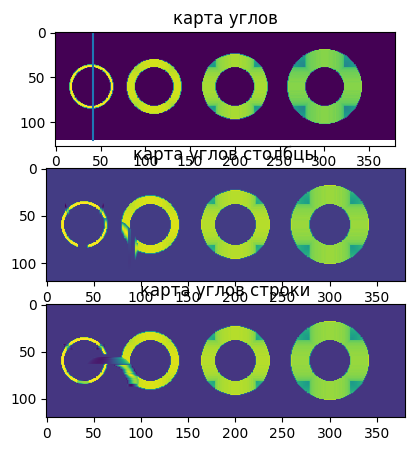

In [186]:
from scipy.interpolate import CubicSpline, lagrange
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial
import random

crop = img.copy()
bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
rows, cols = crop.shape
angles_edges = angles_edges_img_circles
angles_copy_cols = angles_edges.copy()
k = 0
angles_final = angles_edges.copy()
al = np.zeros_like(angles_edges)

for col in range(0, cols):
    col_mask_bord = bord_mask[:,col]
    col_mask_hole = hole_mask[:,col]

    nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
    nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

    start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
    start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1
    delta_x = []
    gray_segments = []
    white_segments_cols = []

    for i in range(0, len(start_ind_bord), 2):
        delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
        gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

    for i in range(0, len(start_ind_hole), 2):
        white_segments_cols.append((start_ind_hole[i], start_ind_hole[i+1]-1))
    for segment, delta in zip(gray_segments, delta_x):
        if delta >= 3:
            ind_mean = segment[0] + delta // 2

            y_mean = angles_edges[ind_mean, col]
            y_mean_lagrange = angles_edges[ind_mean, col]

            y_0 = angles_edges[segment[0], col]/2
            y_n = angles_edges[segment[1], col]/2
            
            x_1 = segment[0] - 1
            x_2 = segment[1] + 1

            y_2 = angles_edges[x_2, col]
            coefs = curve_fit(parabola, [x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0, y_mean_lagrange, y_n, y_2])
            a,b,c = coefs[0]
            x_for_plot = np.arange(segment[0], segment[1]+1)
            y_lagrange = parabola(x_for_plot, a, b, c)
            angles_copy_cols[segment[0]:segment[1]+1, col] = y_lagrange
    
angles_copy_rows = angles_edges.copy()
white_segments_rows = []
for row in range(0, rows):
    row_mask_bord = bord_mask[row,:]
    row_mask_hole = hole_mask[row,:]

    nonzero_ind_bord = np.nonzero(row_mask_bord)[0]
    nonzero_ind_hole = np.nonzero(row_mask_hole)[0]

    start_ind_bord = np.where(np.diff(row_mask_bord == 128))[0] + 1
    start_ind_hole = np.where(np.diff(row_mask_hole == 255))[0] + 1
    if len(start_ind_hole) == 0:
        white_segments_rows.append(None)
    delta_x = []
    gray_segments = []

    for i in range(0, len(start_ind_bord), 2):
        delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
        gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

    for i in range(0, len(start_ind_hole), 2):
        white_segments_rows.append((start_ind_hole[i], start_ind_hole[i+1]-1))

    for segment, delta in zip(gray_segments, delta_x):
        if delta >= 3:
            ind_mean = segment[0] + delta // 2
            y_mean = angles_edges[row, ind_mean]
            y_mean_lagrange = angles_edges[row, ind_mean]
            y_0 = angles_edges[row, segment[0]]/2
            y_n = angles_edges[row, segment[1]]/2
            x_1 = segment[0] - 1
            x_2 = segment[1] + 1
            y_1 = angles_edges[row, x_1]
            y_2 = angles_edges[row, x_2]
            coefs = curve_fit(parabola, [x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0, y_mean_lagrange, y_n, y_2])
            a,b,c = coefs[0]
            x_for_plot = np.arange(segment[0]-1, segment[1]+2)
            y_lagrange = parabola(x_for_plot, a, b, c)
            angles_copy_rows[row, segment[0]-1: segment[1]+2] = y_lagrange



# angles = angles_edges.copy()
# for col in range(0, cols):
#     col_mask_hole = hole_mask[:,col]

#     nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

#     start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1

#     for i in range(0, len(start_ind_hole), 2):
#         white_segments_cols.append((start_ind_hole[i], start_ind_hole[i+1]-1))


angles_min = np.minimum(angles_copy_rows,angles_copy_cols)
angles_max = np.maximum(angles_copy_rows,angles_copy_cols)

fig, ax = plt.subplots(3, 1, figsize=(10, 5))
ax[0].imshow(angles_edges)
ax[0].plot([42, 42], [0, angles_edges.shape[0]])
ax[0].set_title('карта углов')

ax[1].imshow(angles_copy_cols)
ax[1].set_title('карта углов столбцы')

ax[2].imshow(angles_copy_rows)
ax[2].set_title('карта углов строки')

# ax[3].imshow((angles_copy_rows + angles_copy_cols)/2)
# ax[3].set_title('карта углов строки + столбцы MEAN')

# ax[4].imshow(angles_min)
# ax[4].set_title('карта углов строки + столбцы MIN')

# ax[5].imshow(angles_max)
# ax[5].set_title('карта углов строки + столбцы MAX')

In [152]:
bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
rows, cols = crop.shape
# angles_copy_cols = angles_edges.copy()
y = angles_copy_cols.copy()
x = angles_copy_rows.copy()

k = 0
angles_final = np.zeros_like(angles_edges)
# angles_final[angles_final == 0] 
for col in range(0, cols):
    # if col == 41:
    col_mask_bord = bord_mask[:,col]
    col_mask_hole = hole_mask[:,col]

    nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
    nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

    start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
    start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1
    gray_segments = []
    # white_segments_cols = []
    segments= []
    for i in range(0, len(start_ind_bord), 2):
        gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))

    # for i in range(0, len(start_ind_hole), 2):
    #     white_segments_cols.append((start_ind_hole[i], start_ind_hole[i+1]))
    
    work_segments = []
    for segm in gray_segments:
        for i in segm:
            if i in start_ind_hole:
                work_segments.append(segm)
    for segm in work_segments:
        angles_final[segm[0]:segm[1], col] = y[segm[0]:segm[1], col]


for row in range(0, rows):
    # if col == 41:
    row_mask_bord = bord_mask[row,:]
    row_mask_hole = hole_mask[row,:]

    nonzero_ind_bord = np.nonzero(row_mask_bord)[0]
    nonzero_ind_hole = np.nonzero(row_mask_hole)[0]

    start_ind_bord = np.where(np.diff(row_mask_bord == 128))[0] + 1
    start_ind_hole = np.where(np.diff(row_mask_hole == 255))[0] + 1
    gray_segments = []
    # white_segments_cols = []
    segments= []
    for i in range(0, len(start_ind_bord), 2):
        gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]))

    # for i in range(0, len(start_ind_hole), 2):
    #     white_segments_cols.append((start_ind_hole[i], start_ind_hole[i+1]))
    
    work_segments = []
    for segm in gray_segments:
        for i in segm:
            if i in start_ind_hole:
                work_segments.append(segm)
    for segm in work_segments:
        # angles_final[row, segm[0]:segm[1]] = -2
        angles_final[row, segm[0]:segm[1]] = x[row, segm[0]:segm[1]]




final = np.zeros_like(angles_edges)
final[angles_final == -1] = angles_copy_cols[angles_final == -1]
# final[angles_final == -2] = angles_copy_rows[angles_final == -2]


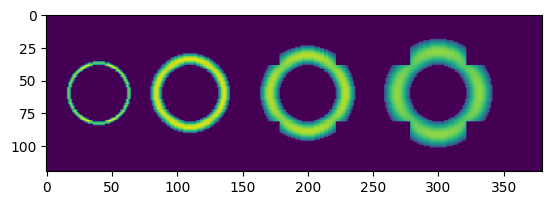

In [156]:
plt.imshow(angles_final)
# plt.plot([42, 42], [0, angles_edges.shape[0]])
# plt.imshow(final)
# plt.imshow(angles_copy_cols)
plt.show()

Text(0.5, 1.0, 'карта углов строки + столбцы MAX')

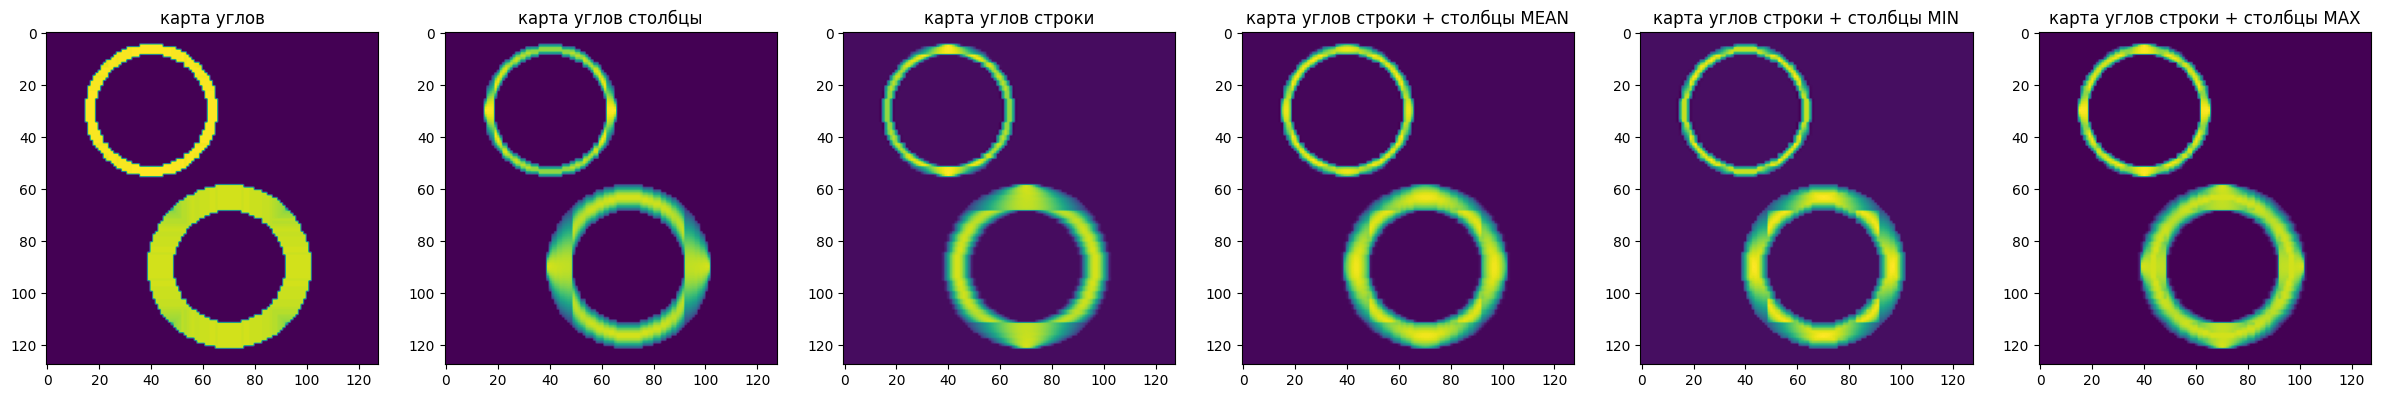

In [825]:
# from scipy.interpolate import CubicSpline, lagrange
# from scipy.optimize import curve_fit
# from numpy.polynomial.polynomial import Polynomial
# import random


# # def approx_angles(img):
# bord_mask = cv2.inRange(crop, 128, 128)
# bord_mask[bord_mask == 255] = 128

# hole_mask = cv2.inRange(crop, 255,255)
# rows, cols = crop.shape
# # copy_col = copy_crop.copy()
# angles_copy_cols = angles_edges.copy()
# k = 0
# for col in range(0, cols):
#     col_mask_bord = bord_mask[:,col]
#     nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
#     start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
#     delta_x = []
#     gray_segments = []

#     for i in range(0, len(start_ind_bord), 2):
#         delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
#         gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

#     for segment, delta in zip(gray_segments, delta_x):
#         if delta >= 3:
#             ind_mean = segment[0] + delta // 2
#             # ind_mean = random.randint(segment[0]+1, segment[1]-1)

#             y_mean = angles_edges[ind_mean, col]
#             y_mean_lagrange = angles_edges[ind_mean, col]

#             y_0 = angles_edges[segment[0], col]/2
#             y_n = angles_edges[segment[1], col]/2
            
#             x_1 = segment[0] - 1
#             x_2 = segment[1] + 1

#             y_2 = angles_edges[x_2, col]
#             # poly = lagrange([x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0, y_mean_lagrange, y_n, y_2])
#             coefs = curve_fit(parabola, [x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0, y_mean_lagrange, y_n, y_2])
#             a,b,c = coefs[0]
#             # x_for_plot = np.arange(x_1, x_2+1)
#             x_for_plot = np.arange(segment[0], segment[1]+1)
#             # y_lagrange = poly(x_for_plot)
#             y_lagrange = parabola(x_for_plot, a, b, c)
#             # angles_copy_cols[x_1:x_2+1, col] = y_lagrange
#             angles_copy_cols[segment[0]:segment[1]+1, col] = y_lagrange


# angles_copy_rows = angles_edges.copy()
# for row in range(0, rows):
#     row_mask_bord = bord_mask[row,:]
#     nonzero_ind_bord = np.nonzero(row_mask_bord)[0]
#     start_ind_bord = np.where(np.diff(row_mask_bord == 128))[0] + 1
#     delta_x = []
#     gray_segments = []

#     for i in range(0, len(start_ind_bord), 2):
#         delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
#         gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

#     for segment, delta in zip(gray_segments, delta_x):
#         if delta >= 3:
#             ind_mean = segment[0] + delta // 2
#             # ind_mean = random.randint(segment[0]+1, segment[1]-1)

#             y_mean = angles_edges[row, ind_mean]
#             y_mean_lagrange = angles_edges[row, ind_mean]

#             y_0 = angles_edges[row, segment[0]]/2
#             y_n = angles_edges[row, segment[1]]/2
            
#             x_1 = segment[0] - 1
#             x_2 = segment[1] + 1

#             y_1 = angles_edges[row, x_1]
#             y_2 = angles_edges[row, x_2]
#             # poly = lagrange([x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0, y_mean_lagrange, y_n, y_2])
#             coefs = curve_fit(parabola, [x_1, segment[0], ind_mean, segment[1], x_2], [y_1, y_0, y_mean_lagrange, y_n, y_2])
#             a,b,c = coefs[0]
#             x_for_plot = np.arange(segment[0]-1, segment[1]+2)
#             # y_lagrange = poly(x_for_plot)
#             y_lagrange = parabola(x_for_plot, a, b, c)
#             # angles_copy_rows[row, x_1:x_2+1] = y_lagrange
#             angles_copy_rows[row, segment[0]-1: segment[1]+2] = y_lagrange


# angles_min = np.minimum(angles_copy_rows,angles_copy_cols)
# angles_max = np.maximum(angles_copy_rows,angles_copy_cols)

# fig, ax = plt.subplots(1, 6, figsize=(30, 5))
# ax[0].imshow(angles_edges)
# ax[0].set_title('карта углов')

# ax[1].imshow(angles_copy_cols)
# ax[1].set_title('карта углов столбцы')

# ax[2].imshow(angles_copy_rows)
# ax[2].set_title('карта углов строки')

# ax[3].imshow((angles_copy_rows + angles_copy_cols)/2)
# ax[3].set_title('карта углов строки + столбцы MEAN')

# ax[4].imshow(angles_min)
# ax[4].set_title('карта углов строки + столбцы MIN')

# ax[5].imshow(angles_max)
# ax[5].set_title('карта углов строки + столбцы MAX')

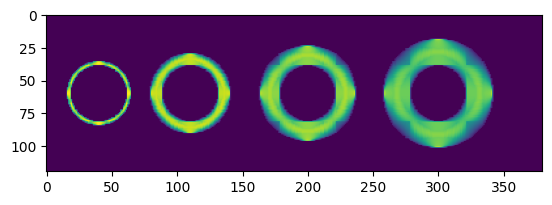

In [157]:
mean_angles = (angles_copy_rows + angles_copy_cols)/2
mean_angles = np.maximum(angles_copy_rows,angles_copy_cols)

plt.imshow(mean_angles )

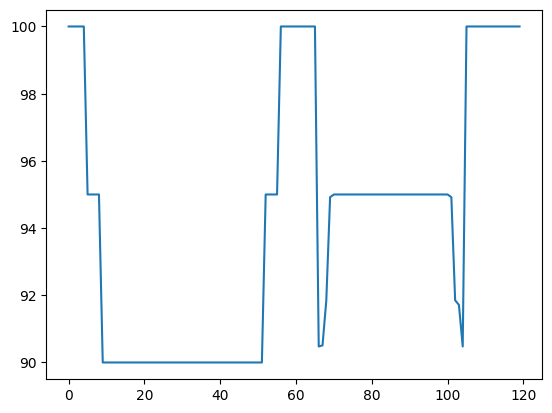

In [259]:
from scipy.interpolate import CubicSpline, lagrange
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial
bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
rows, cols = crop.shape
# copy_col = copy_crop.copy()
dist_cols = map_height.copy()
k = 0
for col in range(0, cols):
    # if col == 60:
    col_mask_bord = bord_mask[:,col]
    nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
    start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
    delta_x = []
    gray_segments = []
    # print(start_ind_bord)
    for i in range(0, len(start_ind_bord), 2):
        delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
        gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

    for segment, delta in zip(gray_segments, delta_x):
        if delta >= 3:
            ind_mean = segment[0] + delta // 2
        # if delta >= 3:
        # print(col, segment, delta)
            for x in range(segment[0], segment[1]+1):
                # if segment[]
                # print(segment, delta - (segment[1] - x))
                # print(np.tan(mean_angles[x, col])*(delta - (segment[1] - x)) + 100)
                if x < ind_mean:
                    dist_cols[x, col] = np.abs(np.tan(np.radians(180) - mean_angles[x, col]))*(delta - (segment[1] - x)) + 90
                else:
                    dist_cols[x, col] = np.abs(np.tan(mean_angles[x, col]))*(delta - (segment[1] - x)) + 90


dist_rows = map_height.copy()
for row in range(0, rows):
    # if col == 60:
    row_mask_bord = bord_mask[row,:]
    nonzero_ind_bord = np.nonzero(row_mask_bord)[0]
    start_ind_bord = np.where(np.diff(row_mask_bord == 128))[0] + 1
    delta_x = []
    gray_segments = []

    for i in range(0, len(start_ind_bord), 2):
        delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
        gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))
    
    for segment, delta in zip(gray_segments, delta_x):
        if delta >= 3:
            ind_mean = segment[0] + delta // 2
        # if delta >= 3:
        # print(row, segment, delta)
            for x in range(segment[0], segment[1]+1):
                # if segment[]
                # print(segment, delta - (segment[1] - x))
                # print(np.tan(mean_angles[x, col])*(delta - (segment[1] - x)) + 100)
                if x < ind_mean:
                    dist_cols[row, x] = np.abs(np.tan(np.radians(180) - mean_angles[row, x]))*(delta - (segment[1] - x)) + 90
                else:
                    dist_cols[row, x] = np.abs(np.tan(mean_angles[row, x]))*(delta - (segment[1] - x)) + 90

# dist = np.maximum(dist_cols, dist_rows)
dist = np.minimum(dist_cols, dist_rows)

# dist = (dist_cols + dist_rows)//2

plt.plot(dist[:, 40])

## Подбор формулы сигнала

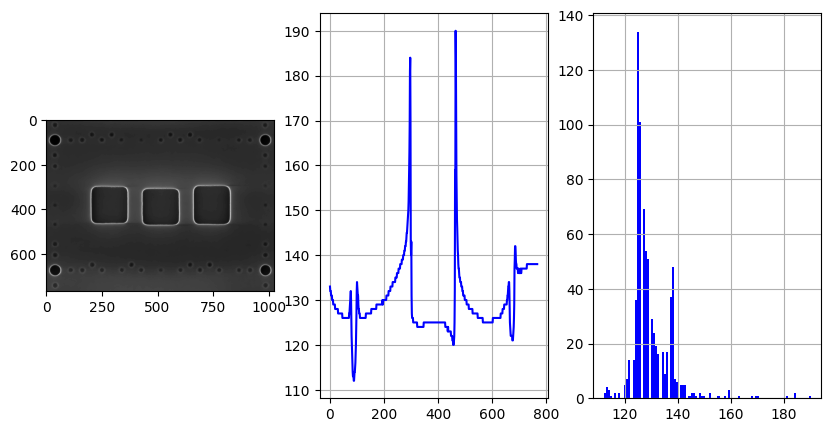

In [22]:
img_colors = cv2.imread('./data/G41_C1_R2___43.png', 0)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(img_colors, cmap='gray')
# ax[0].plot([250, 250], [0, 768], color='blue')

ax[1].plot(img_colors[:, 250], color='blue')
ax[1].grid()

ax[2].hist(img_colors[:, 250], color='blue', bins=100)
ax[2].grid()

mean back 42.926178
mean hole 50.120773
mean bord 89.895226
MIN bord 25.003313
mean color bord:  106.82668
MAX value:  255.0
MIN value:  115.00419


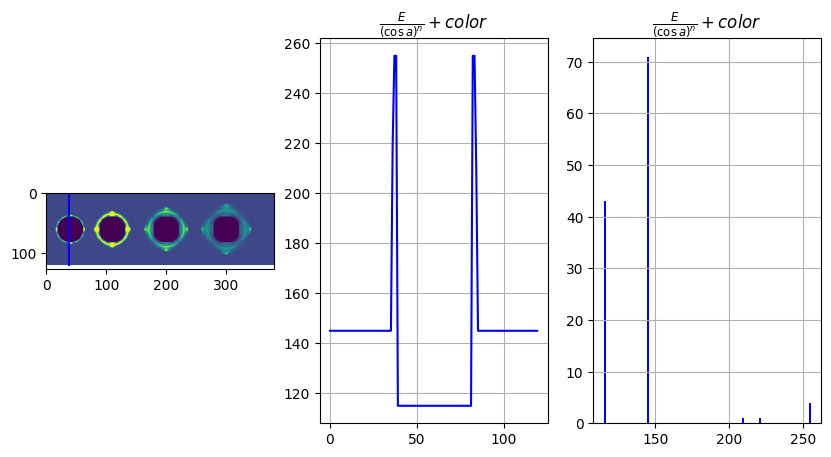

In [158]:
E = 25
signal = np.zeros_like(crop, dtype=np.float32)

alpha_bord = mean_angles[crop == 128]
alpha_bord[alpha_bord==alpha_bord.min()] = np.radians(1)

alpha_back = mean_angles[crop == 0]
alpha_hole = mean_angles[crop == 255]

print('mean back', np.mean(E / np.abs(np.cos(alpha_back + 1))**(0.87)))
# print('mean hole', np.mean(0.2 * E / np.cos(alpha_hole + 1)**(1.1)))
print('mean hole', np.mean(E / np.abs(np.cos(alpha_hole + 1))**(1.1)))

print('mean bord', np.mean((E / np.abs(np.cos(alpha_bord)))**(0.87)))
print('MIN bord', (E / np.abs(np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord)))**(0.87)).min())

print('mean color bord: ', np.mean(color_map[crop==128]))

# signal[crop == 0] =  E / np.cos(alpha_back + 1)**(0.87) + 100
signal[crop == 0] =  (E / (np.abs(np.cos(np.radians(alpha_back + 1)))**(0.87))) + color_map[crop==0]

# signal[crop == 128] = E / np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord))**(0.87) + 120
# signal[crop == 128] = E / np.abs(np.cos(np.radians(90) - alpha_bord))**(0.87) + color_map[crop==128]
signal[crop == 128] = (E / (np.abs(np.cos(np.radians(90) - (np.radians(180 - 90) - alpha_bord)))**(0.87))) + color_map[crop==128]


# signal[crop == 255] = E / np.cos(alpha_hole + 1)**(1.1) + 60
signal[crop == 255] = (E / (np.abs(np.cos(np.radians(alpha_hole + 1)))**(1.1))) + color_map[crop==255]

signal = np.clip(signal, 0, 255)
# mask = signal[crop == 0]
# mask_ = mask == 0

# signal[mask_] = np.mean(mask)
# cv2.imwrite(f'var1_crop_E{E}.png', signal.astype(np.uint8))
cv2.imwrite(f'var1_img_circles3_E{E}.png', signal.astype(np.uint8))


fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(signal)
ax[0].plot([38, 38], [0, signal.shape[0]], color='blue')

ax[1].plot(signal[:, 38], color='blue')
ax[1].grid()
ax[1].set_title(r'$\frac{E}{(\cos a)^n} + color$')


ax[2].hist(signal[:, 38], color='blue', bins=100)
ax[2].grid()
ax[2].set_title(r'$\frac{E}{(\cos a)^n} + color$')


print('MAX value: ', signal.ravel().max())
print('MIN value: ', signal.ravel().min())





mean back 20.002653
mean hole 20.003351
mean bord 89.23308
MIN bord 89.23308
MAX value:  255.0
MIN value:  99.01312


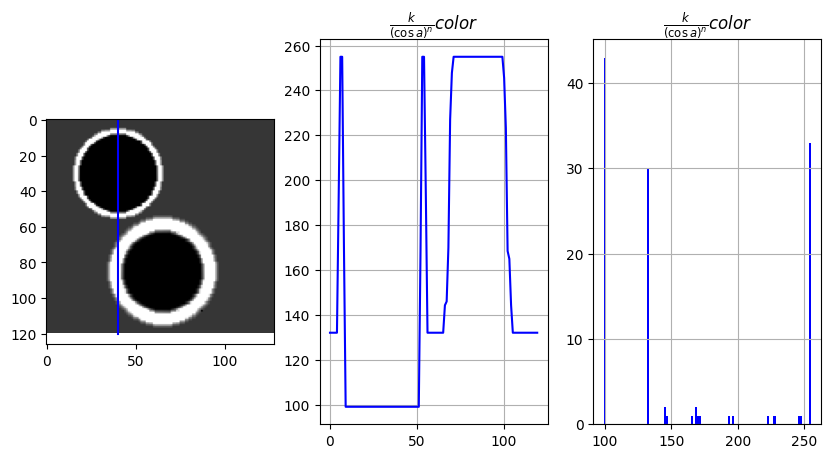

In [59]:
E = 20
signal = np.zeros_like(crop, dtype=np.float32)

alpha_bord = mean_angles[crop == 128]


alpha_bord[alpha_bord==alpha_bord.min()] = np.radians(1)

alpha_back = mean_angles[crop == 0]
alpha_hole = mean_angles[crop == 255]


print('mean back', np.mean(E / np.abs(np.cos(np.radians(alpha_back + 1)))**(0.87)))
print('mean hole', np.mean(E / np.abs(np.cos(np.radians(alpha_hole + 1)))**(1.1)))

print('mean bord', np.mean(E / np.abs(np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord)))**(0.87)))
print('MIN bord', np.mean(E / np.abs(np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord)))**(0.87)))

k = 1.1
# signal[crop == 0] = (1.3 / (np.abs(np.cos(np.radians(alpha_back + 1)))**(0.87))) *color_map[crop==0]
signal[crop == 0] = (k / (np.abs(np.cos(np.radians(alpha_back + 1)))**(0.87))) *color_map[crop==0]


# signal[crop == 128] = (1.5 / (np.abs(np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord)))**(0.87))) *color_map[crop==128]
signal[crop == 128] = (k / (np.abs(np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord)))**(0.87))) *color_map[crop==128]


# signal[crop == 255] = (1.2 / (np.abs(np.cos(np.radians(alpha_hole + 1)))**(1.1))) * color_map[crop==255]
signal[crop == 255] = (k / (np.abs(np.cos(np.radians(alpha_hole + 1)))**(1.1))) * color_map[crop==255]


signal = np.clip(signal, 0, 255)
cv2.imwrite(f'var2_output_crop_k{k}.png', signal.astype(np.uint8))

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(signal, cmap='gray')
ax[0].plot([40, 40], [0,signal.shape[0]], color='blue')

ax[1].plot(signal[:, 40], color='blue')
ax[1].grid()
ax[1].set_title(r'$\frac{k}{(\cos a)^n}color$')

ax[2].hist(signal[:, 40], color='blue', bins=100)
ax[2].grid()
ax[2].set_title(r'$\frac{k}{(\cos a)^n}color$')


print('MAX value: ', signal.ravel().max())
print('MIN value: ', signal.ravel().min())

mean back 20.002653
mean hole 20.003351
mean bord 89.23308
MIN bord 89.23308
MAX value:  255.0
MIN value:  90.003586


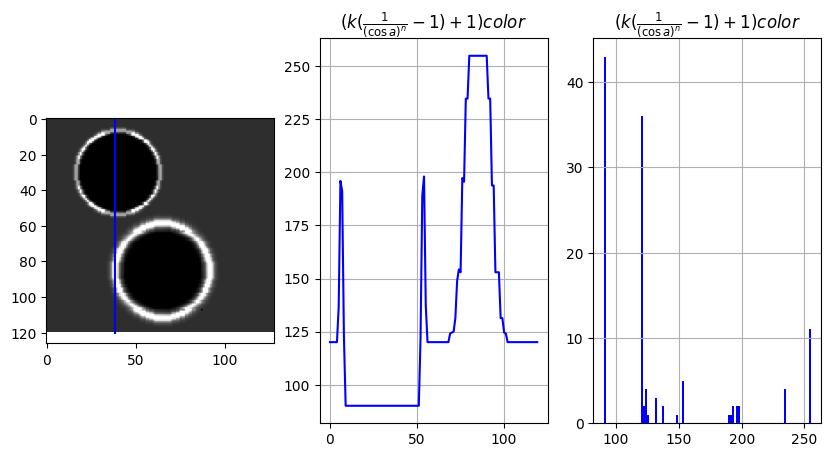

In [62]:
signal = np.zeros_like(crop, dtype=np.float32)


alpha_bord = mean_angles[crop == 128]

alpha_bord[alpha_bord==alpha_bord.min()] = np.radians(1)

alpha_back = mean_angles[crop == 0]
alpha_hole = mean_angles[crop == 255]


print('mean back', np.mean(E / np.abs(np.cos(np.radians(alpha_back + 1)))**(0.87)))
print('mean hole', np.mean(E / np.abs(np.cos(np.radians(alpha_hole + 1)))**(1.1)))

print('mean bord', np.mean(E / np.abs(np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord)))**(0.87)))
print('MIN bord', np.mean(E / np.abs(np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord)))**(0.87)))

k = 0.3
signal[crop == 0] = (k*(1/(np.abs(np.cos(np.radians(alpha_back + 1)))**(0.87)) - 1) + 1) * color_map[crop==0]

signal[crop == 128] = (k * (1/(np.abs(np.cos(np.radians(90)-(np.radians(180 - 90) - alpha_bord)))**(0.87)) - 1) + 1) *color_map[crop==128]


signal[crop == 255] = (k * (1 / (np.abs(np.cos(np.radians(alpha_hole + 1)))**(1.1)) - 1) + 1) * color_map[crop==255]


signal = np.clip(signal, 0, 255)
cv2.imwrite(f'var3_output_crop_k{k}.png', signal.astype(np.uint8))

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(signal, cmap='gray')
ax[0].plot([38, 38], [0,signal.shape[0]], color='blue')

ax[1].plot(signal[:, 38], color='blue')
ax[1].grid()
ax[1].set_title(r'$(k(\frac{1}{(\cos a)^n} - 1) + 1)color$')

ax[2].hist(signal[:, 38], color='blue', bins=100)
ax[2].grid()
ax[2].set_title(r'$(k(\frac{1}{(\cos a)^n} - 1) + 1)color$')

print('MAX value: ', signal.ravel().max())
print('MIN value: ', signal.ravel().min())

среднюю точку

середину краевых точек

надо получить не один угол, а разные

то есть сейчас прямая линия, а должна стать типа парабола какая-то

In [49]:
# bord_mask = cv2.inRange(crop, 128, 128)
# bord_mask[bord_mask == 255] = 128

# hole_mask = cv2.inRange(crop, 255,255)
# # copy_col = crop.copy()
# rows, cols = crop.shape
# # copy_col[crop == 0] = 200
# # copy_col[crop == 255] = 0
# copy_col = copy_crop.copy()

# for col in range(0, cols):
#     if col == 70:
#         col_mask_bord = bord_mask[:,col]
#         nonzero_ind_bord = np.nonzero(col_mask_bord)[0]

#         start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1

#         delta_x = []
#         gray_segments = []

#         for i in range(0, len(start_ind_bord), 2):
#             delta_x.append(start_ind_bord[i+1] - start_ind_bord[i])
#             gray_segments.append((start_ind_bord[i], start_ind_bord[i+1]-1))

#         for segment, delta in zip(gray_segments, delta_x):
#             print('current segment and delta', segment, delta)
#             x_new = np.arange(segment[0], segment[1]+1)
#             ind = random.randint(segment[0]+1, segment[1]-1)
#             y_ind = copy_crop[ind, col]

#             print('point ', (ind, y_ind))
#             y_new = cub(x_new, (ind, y_ind), delta)
#             copy_col[segment[0]:segment[1]+1, col] = y_new
#             copy_col[segment[0], col] = 200
#             copy_col[segment[1]+1, col] = 0